# Segmentation of Cells On Microscope Images using UNet

## 0. Imports and install packeges

In [32]:
import torch
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import zipfile
import random

## 1. Get the dataset

### 1.1 Donwload images

In [7]:
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/images.zip

--2024-02-02 13:03:28--  http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/images.zip
Resolving livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)... 52.219.168.37, 52.219.171.202, 3.5.136.135, ...
Connecting to livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)|52.219.168.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1241715651 (1.2G) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.16G  19.4MB/s    in 87s     

2024-02-02 13:04:56 (13.6 MB/s) - ‘images.zip’ saved [1241715651/1241715651]



In [8]:
dataset_path_zip = '/content/images.zip'
zipfile.ZipFile(dataset_path_zip).extractall('/content/')

In [6]:
# 5% of the train annotations
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell_dataset_size_split/2_train5percent.json

# Validation and Test annotations
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_val.json
!wget http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_test.json

--2024-02-02 13:02:10--  http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell_dataset_size_split/2_train5percent.json
Resolving livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)... 3.5.137.167, 52.219.140.125, 52.219.169.14, ...
Connecting to livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)|3.5.137.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27988522 (27M) [application/json]
Saving to: ‘2_train5percent.json’

2_train5percent.jso 100%[===================>]  26.69M  11.2MB/s    in 2.4s    

2024-02-02 13:02:13 (11.2 MB/s) - ‘2_train5percent.json’ saved [27988522/27988522]

--2024-02-02 13:02:13--  http://livecell-dataset.s3.eu-central-1.amazonaws.com/LIVECell_dataset_2021/annotations/LIVECell/livecell_coco_val.json
Resolving livecell-dataset.s3.eu-central-1.amazonaws.com (livecell-dataset.s3.eu-central-1.amazonaws.com)..

### 1.2 Instanciate datasets and Visualizing random images of dataset

In [9]:
# Train, Val and Test images and annotation paths
train_dataset_image_root_path = '/content/images/livecell_train_val_images'
train_dataset_annotations_root_path = '/content/2_train5percent.json'

val_dataset_image_root_path = '/content/images/livecell_train_val_images'
val_dataset_annotations_root_path = 'livecell_coco_val.json'

test_dataset_image_root_path = '/content/images/livecell_test_images'
test_dataset_annotations_root_path = '/content/livecell_coco_test.json'

In [10]:
train_dataset = datasets.CocoDetection(root=train_dataset_image_root_path, annFile=train_dataset_annotations_root_path)
val_dataset = datasets.CocoDetection(root=train_dataset_image_root_path, annFile=val_dataset_annotations_root_path)

loading annotations into memory...
Done (t=1.17s)
creating index...
index created!
loading annotations into memory...
Done (t=4.16s)
creating index...
index created!


In [11]:
train_dataset, val_dataset

(Dataset CocoDetection
     Number of datapoints: 162
     Root location: /content/images/livecell_train_val_images,
 Dataset CocoDetection
     Number of datapoints: 570
     Root location: /content/images/livecell_train_val_images)

In [63]:
def show_random_samples(dataset: datasets.CocoDetection, qty: int=5) -> None:
  random_samples = random.sample(range(len(dataset)), k=qty)

  fig = plt.figure(figsize=(15, 15))

  for i, sample in enumerate(random_samples):
    fig.add_subplot(1, qty, i+1)
    plt.imshow(dataset[sample][0])
    plt.axis('off')

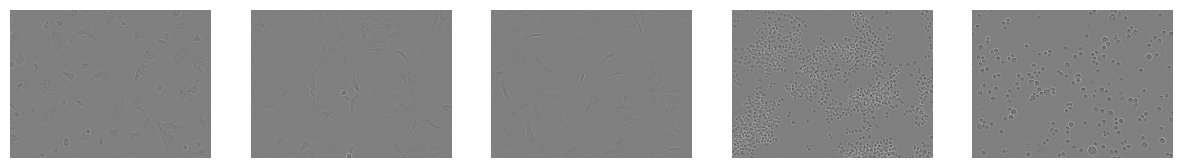

In [64]:
show_random_samples(train_dataset)

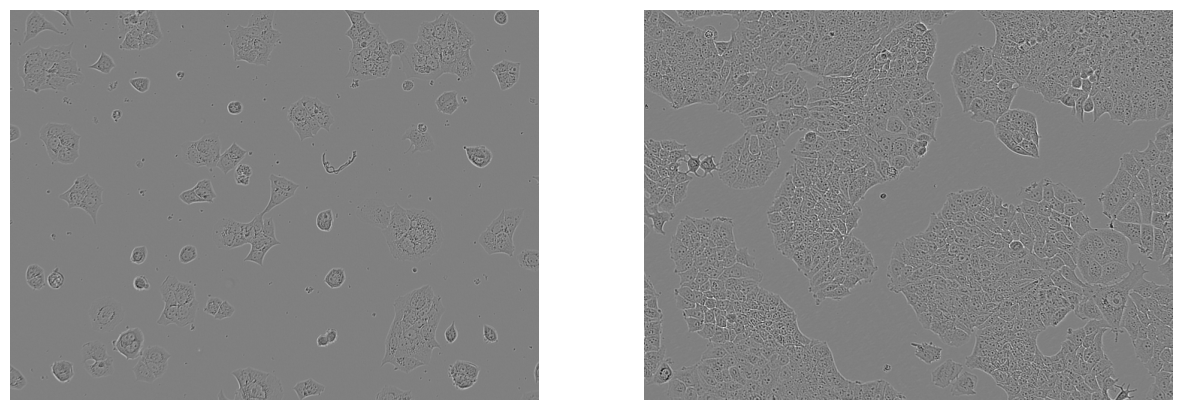

In [66]:
show_random_samples(val_dataset, qty=2)

### 1.3 Visualizing the maks segmentation

### 1.4 Visualizing random images and its respective masks